In [1]:
from IR_Functions import *
from structure_tools import dice
import matplotlib.pyplot as plt

In [2]:
# state = LoadPickle('Struct_Builder_Training_State_5abssc.2_0.state')

In [3]:
# [type(s) for s in state]

In [4]:
state_rep_history, state_next_rep_history, state_history, state_next_history, rewards_history, rewards_next_history, done_history, episode_reward_history, running_reward, episode_count, frame_count, episode_cas, states, episode_reward, weight_history, loss_history, last_reward, avg_reward_history\
            = LoadPickle('Struct_Builder_Training_State_5abssc.2_0.state')

In [10]:
# loss_history.keys()

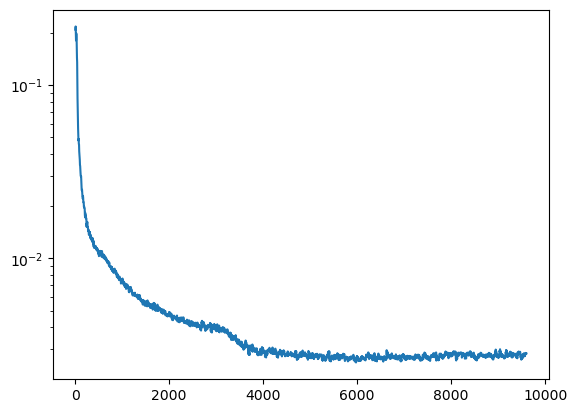

In [19]:
plt.yscale('log')
plt.plot(*zip(*loss_history.items()))

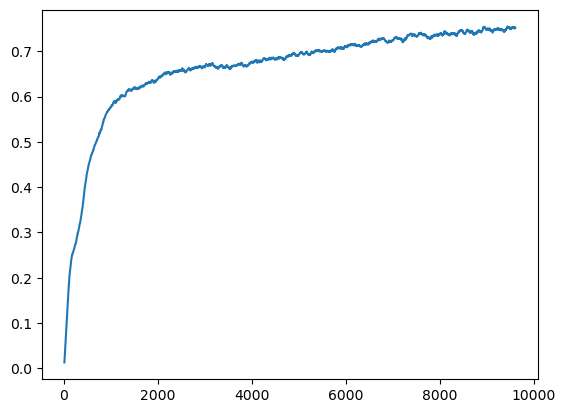

In [22]:
plt.plot(*zip(*avg_reward_history.items()))

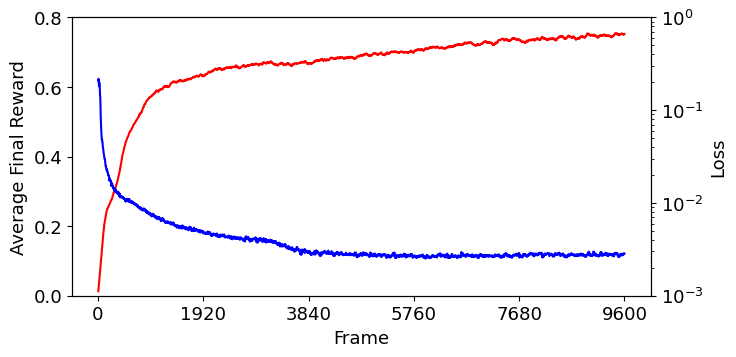

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 13})

x, loss = zip(*loss_history.items())
avg = [avg_reward_history[k] for k in x]

# Create some mock data
t = x
data2 = loss
data1 = avg

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('Training Frame')
ax1.set_ylabel('Average Final Reward')
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y')
ax1.set_ybound(0,0.8)
ax1.set_xticks([i*32*60 for i in range(6)])
ax1.set_xmargin(10000/32/300/2)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Loss')  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y')
ax2.set_yscale('log')
ax2.set_ybound(1E-3,1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_figwidth(8)
fig.set_figheight(3.5)
plt.show()

In [2]:
keys, structs = LoadPickle('UniqueSamples_NoRings_v5.pickle')

In [3]:
list(structs[keys[0]].keys())

['SMILES', 'spec', 'structure', 'substructures', 'processed_spec']

In [4]:
import numpy as np
coefs = []

for i,k in enumerate(keys[:-1]):
    print(i,k)
    for j in range(i+1, len(keys)):
        k2 = keys[j]
        coefs.append(
            dice(structs[k]['structure'], structs[k2]['structure'])
        )

0 CCC#CCCO
1 C=C(C)C#CCC
2 CCCO
3 CCCC(CCC)(CCC)CCC
4 CCOC(=O)NCNC(=O)OCC
5 OCCCCCCCCO
6 CC=C(C)C=O
7 CCCCCCC#CCO
8 COCCC(OC)OC
9 C=COCCOC
10 CCCCCCCC(C)O
11 CCC=CCCCCCC
12 CCCCCOC(C)=O
13 NCCNCCO
14 CCCC(C)(C)C
15 C=CCCC(=C)C
16 C=C=CC
17 CCCC#CCCC
18 CCC(C)(CO)CO
19 CCCCCC(=O)CCC
20 CCCCCCCCC(=O)CCCC
21 CC(C)=C(C)C
22 CCCC=CC(C)C
23 NCCO
24 CC=C(C)CCC=C(C)C
25 CCCC=CCCCCC
26 CCCCCC=CC(=O)O
27 CCCCCCCCCNCCCCCCCCC
28 CCCCCCC(O)C(C)CC
29 CCCCCCCCC(=O)OC
30 CCOC(=O)C(C)=O
31 CCCCCCCC(O)CCCC
32 CC(O)COCC(C)O
33 C#CCCCCCCCCC(=O)O
34 CCC=CC(=O)O
35 CCN(CC)CCCC(C)N
36 CCCCC(CC)COC(=O)CC#N
37 CCCCCOC(=O)CCCCC
38 C=C(C)COCC(=C)C
39 CCCCCCCN=C=O
40 CCCCCCCCCC
41 CC(CC(C)(C)C)CC(C)(C)C
42 COC(=O)CCCC(=O)O
43 CCCCCCCCCCCC(=O)N(CC)CC
44 CCCCN(CCCC)CCCCO
45 CCO
46 CCCCCCCCCCCCCCCCC(C(=O)O)C(=O)O
47 CCCCCCC(=O)CCCC
48 CCCCCCCCCCCCCCCC(=O)OC(C)C
49 CCOC(=O)CC(O)(CC(=O)OCC)C(=O)OCC
50 CCCCCCNCCO
51 CC(=O)NNC(C)=O
52 C=CCOC(=O)C=CC(=O)OCC=C
53 CCCCC(O)CC(C)C
54 CCCCCCCCCCCCC(C)O
55 CCCCCCCCCCCCCC(=O)O


In [5]:
np.mean(coefs), np.std(coefs)

(0.3331271284837579, 0.17032791927019145)